In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import statistics
import sklearn
%matplotlib inline

Загрузить датасет по url:


In [2]:
# данные загружаются с сервера

url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

#### описание 11 столбцов:

*  **Country (region)** Название страны.
*  **Ladder** "Лестница Кантрила" - степень удовлетворенности жизнью.
*  **SD of Ladder** Стандартное отклонение "лестницы Кантрила".
*  **Positive affect** Мера положительных эмоций.
*  **Negative affect** Мера отрицательных эмоций.
*  **Social support** Степень, в которой Социальная поддержка способствовала вычислению показателя счастья.
*  **Freedom** Степень, в которой Свобода способствовала вычислению показателя счастья.
*  **Corruption** Степень, в которой восприятие Коррупции способствует оценке счастья.
*  **Generosity** Степень, в которой Щедрость способствовала вычислению оценки счастья.
*  **Log of GDP per capita** Степень, в которой ВВП влияет на расчет показателя счастья.
*  **Healthy life expectancy** Степень, в которой Ожидаемая продолжительность жизни способствовала вычислению показателя счастья.

Посмотреть первые несколько рядов таблицы:

In [3]:
df.head(3)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0


Построить частотный график для двух параметров: Freedom и Positive affect. Какое это распределение?

#### график для Freedom

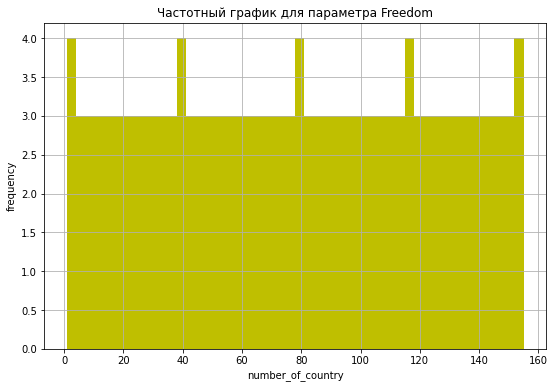

In [4]:
# увеличим размер графиков
plt.figure(figsize=(9, 6))

# установим число групп, равное 50
# если применить bins=156 (по числу стран), график покажет одно пропущенное значение
# для данной задачи - определить тип распределения - оно не удалялось
plt.hist(df['Freedom'], bins=50, facecolor='y')

# подписи к осям
plt.xlabel('number_of_country')
plt.ylabel('frequency')

# заголовок графика + сетка
plt.title('Частотный график для параметра Freedom')
plt.grid(True)

#### график для Positive affect

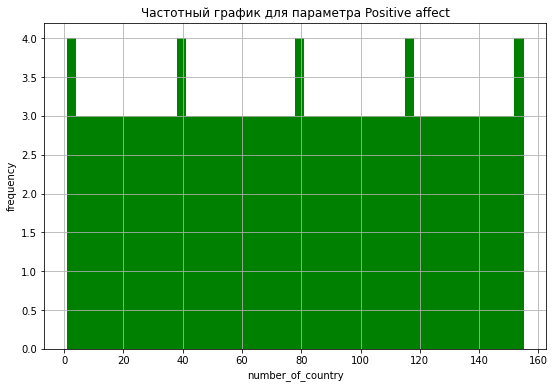

In [5]:
# код и логика аналогичны
plt.figure(figsize=(9, 6))

# если применить bins=156 (по числу стран), график покажет, что у этого
# параметра также пропущено одно значение
plt.hist(df['Positive affect'], bins=50, facecolor='g')

plt.xlabel('number_of_country')
plt.ylabel('frequency')

plt.title('Частотный график для параметра Positive affect')
plt.grid(True)

#### Согласно построенным графикам - для Freedom и Positive affect - значения обоих параментов, с небольшими отклонениями, распределены равномерно.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

#### Помимо метода info(), построенный выше график показал, что в столбце Freedom пропущено одно значение (комментарии про bins=156). Для целей расчета статистических показателей это значение удаляем:

In [6]:
df_freedom = df['Freedom'].dropna()

In [7]:
# медиана

statistics.median(df_freedom)

78.0

In [8]:
# мода

statistics.mode(df_freedom)

StatisticsError: no unique mode; found 155 equally common values

#### Мода не определяется: в столбце Freedom - 155 "одинаково распространенных значений", т.е. каждое значение представлено по одному разу.

In [9]:
# математическое ожидание

statistics.mean(df_freedom)

78.0

In [10]:
# стандартное отклонение

round(statistics.pstdev(df_freedom), 2)

44.74

In [11]:
# дисперсия

statistics.pvariance(df_freedom)

2002.0

In [12]:
# другой вариант расчета дисперсии

round((statistics.pstdev(df_freedom)) ** 2, 1)

2002.0

In [13]:
# минимум

min(df_freedom)

1.0

In [14]:
# максимум

max(df_freedom)

155.0

In [15]:
# размах

max(df_freedom) - min(df_freedom)

154.0

In [ ]:
# есть ли выбросы

1. В исходном столбце Freedom есть одно пропущенное значение - это и есть выброс (от него избавились для расчета статистик).

1. Среди оставшихся, значений, сильно выделяющихся от остальных, у показателя Freedom нет (об этом говорит построенный ниже график).

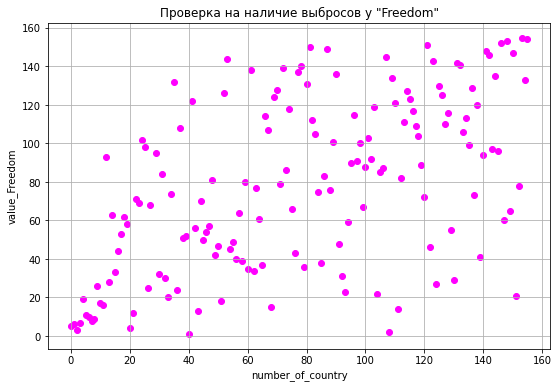

In [16]:
plt.figure(figsize=(9, 6))

df['Freedom'] = df['Freedom'].dropna()

plt.scatter(df.index, df['Freedom'], c='magenta')
 
plt.xlabel('number_of_country')
plt.ylabel('value_Freedom')

plt.title('Проверка на наличие выбросов у "Freedom"')
plt.grid()

Почему нельзя найти моду?

Ответ на этот вопрос приведен выше в расчете моды.

Посмотреть корреляцию между Freedom и Positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [17]:
# справочно посмотрим на сводную статистику по двум параметрам
# все значения совпадают, интересно, как это отразится на графике

df.describe()[['Freedom', 'Positive affect']]

,Freedom,Positive affect
count,155.000000,155.000000
mean,78.000000,78.000000
std,44.888751,44.888751
min,1.000000,1.000000
25%,39.500000,39.500000
50%,78.000000,78.000000
75%,116.500000,116.500000
max,155.000000,155.000000


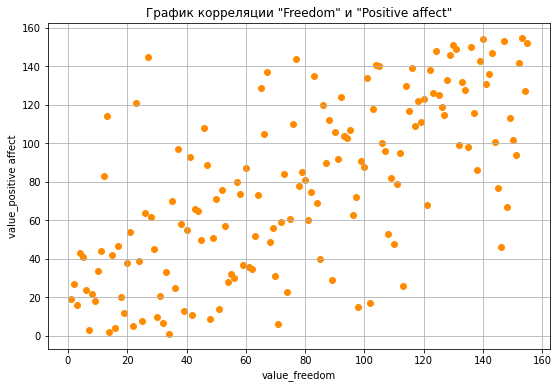

In [18]:
# корреляция графически

plt.figure(figsize=(9, 6))

# в каждом из столбцов по одному пропущенному значению, удалим их
df['Freedom'] = df['Freedom'].dropna()
df['Positive affect'] = df['Positive affect'].dropna()

plt.scatter(df['Freedom'], df['Positive affect'], c='darkorange')

plt.xlabel('value_freedom')
plt.ylabel('value_positive affect')

plt.title('График корреляции "Freedom" и "Positive affect"')
plt.grid()

#### Выборки незначительны - всего по 155 значений у каждого показателя. Тем не менее, полученный график отражает достаточно сильную взаимосвязь (корреляцию) между "Freedom" и "Positive affect": при увеличении значений одного также увеличиваются значения другого показателя.

In [19]:
# корреляция математически (расчет коэффициента корреляции Пирсона)

# перед расчетом проверяем выполнение условий:

# 1. ДОПУСКАЕМ, что значения в рассматриваемых выборках распределены нормально.
# 2. все значения измерены количественно (в интервальной шкале или шкале отношений).
# 3. количество значений в выборках одинаково.

# условия выполняются, рассчитываем коэффициент 
# (предварительно удалим пропущенные значения - выбросы)

df_f = df['Freedom'].dropna()
df_p = df['Positive affect'].dropna()

corr, p_value = sts.pearsonr(df_f, df_p)
print(f'Коэффициент корреляции Пирсона равен {round(corr, 2)}')


Коэффициент корреляции Пирсона равен 0.68


#### Знак "+" у коэффициента говорит о прямой статистической зависимости двух переменных - df_f и df_p: при увеличении значений одного увеличиваются значения другого. Такой же вывод был сделан и при определении графической корреляции.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [20]:
# центрирование - вычитание среднего из каждого значения выборки - перенос начала координат в так называемый центр тяжести системы точек

df_freed = df['Freedom'].dropna()
df_freed_center = df_freed - statistics.mean(df_freed)

print(min(df_freed_center))
print(max(df_freed_center))


-77.0
77.0


In [21]:
print(statistics.mean(df_freed_center))

0.0


Среднее значение выборки после центрирования равно 0, в нормализации данных необходимости нет. Тем не менее, приведем разброс данных к виду (-1,1).

In [22]:
# масштабирование

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

df_freed_scaler = min_max_scaler.fit_transform(np.array(df_freed_center).reshape(-1, 1))

print(min(df_freed_scaler))
print(max(df_freed_scaler))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

#### В методе corr, используемом для построения матрицы корреляций, для расчета коэффициентов по умолчанию применяется метод Пирсона. В исходной таблице есть пропущенные значения - выбросы, заменим их нулями для более корректного расчета.

In [23]:
matrix = df.fillna(0)
matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          156 non-null    float64
 4   Negative affect          156 non-null    float64
 5   Social support           156 non-null    float64
 6   Freedom                  156 non-null    float64
 7   Corruption               156 non-null    float64
 8   Generosity               156 non-null    float64
 9   Log of GDP
per capita    156 non-null    float64
 10  Healthy life
expectancy  156 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


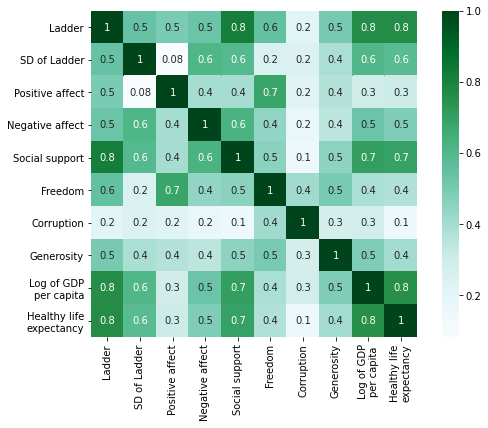

In [24]:
# построим матрицу корреляций

plt.figure(figsize=(9, 6))
sns.heatmap(matrix.corr(), cmap='BuGn', annot=True, fmt='.1g', square=True)

#### Согласно полученной матрице корреляций показатель "коррупция" - единственный показатель, который статистически никак не связан с остальными.

Загрузить таблицу цен на авокадо: 

In [25]:
df_avocado = pd.read_csv('avocado.csv')
df_avocado.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Сделать частотный график колонки AveragePrice. Какое это распределение?

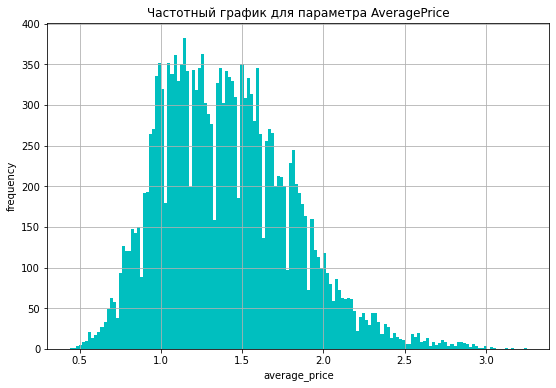

In [26]:
plt.figure(figsize=(9, 6))

plt.hist(df_avocado['AveragePrice'], bins=150, facecolor='c')

plt.xlabel('average_price')
plt.ylabel('frequency')

plt.title('Частотный график для параметра AveragePrice')
plt.grid(True)

#### С некоторыми отклонениями данный частотный график похож на нормальное распределение. Большая часть авокадо продается по средней цене от 1,0 до 1,5 $ США. 

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [27]:
aver_price = df_avocado['AveragePrice']
quantity_4046 = df_avocado['4046']
quantity_4225 = df_avocado['4225']
quantity_4770 = df_avocado['4770']

In [29]:
# корреляцию определяем математически через коэффициент корреляции Пирсона
# (количество значений одинаковое, пропущенных данных нет)

corr, p_value = sts.pearsonr(quantity_4046, aver_price)
print(round(corr,2))

-0.21


In [30]:
corr, p_value = sts.pearsonr(quantity_4225, aver_price)
print(round(corr,2))

-0.17


In [31]:
corr, p_value = sts.pearsonr(quantity_4770, aver_price)
print(round(corr,2))

-0.18


#### Все три значения корреляции - со знаком "минус". Это обратная корреляция, т.е. при увеличении значений первой переменной происходит уменьшение значений у второй.

#### Каждый из трех рассчитанных коэффициентов близок к нулю, что означает статистическую независимость рассмотренных парных признаков, их линейную независимость.

#### Но надо учесть, что на расчет коэффициента корреляции Пирсона влияют выбросы, а перед расчетом предварительная очистка данных на этот счет не проводилась. Кроме того, возможно необходим другой анализ - регрессионный, который сможет выявить другой тип взаимосвязи переменных.